In [27]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical

In [28]:
wine_data = datasets.load_wine()

print(wine_data["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [29]:
data = pd.DataFrame(data=wine_data["data"], columns=wine_data["feature_names"])

data["target"] = wine_data["target"]

data.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0,2
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,1
165,13.73,4.36,2.26,22.5,88.0,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520.0,2
163,12.96,3.45,2.35,18.5,106.0,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675.0,2


In [30]:
data.shape

(178, 14)

In [31]:
data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [32]:
import seaborn as sns

data["target"].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

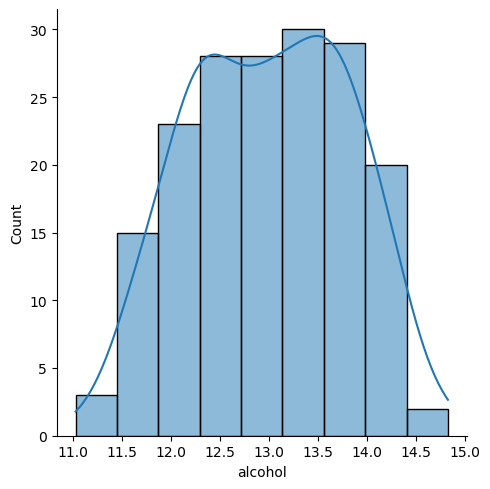

In [33]:
sns.displot(data["alcohol"], kde=1)

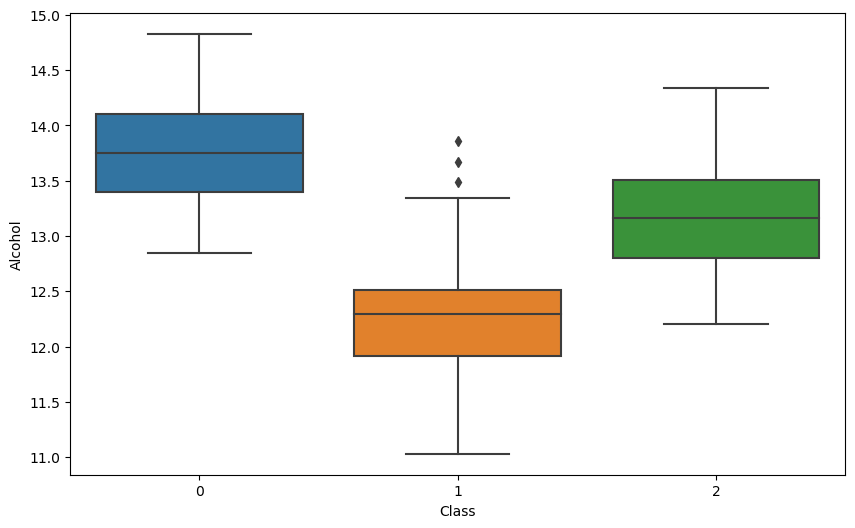

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10,6])

sns.boxplot(x="target", y="alcohol", data=data)

plt.xlabel("Class")
plt.ylabel("Alcohol")

plt.show()

In [35]:
features = data.drop("target", axis=1)

target = data[["target"]]

In [36]:
features.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0
87,11.65,1.67,2.62,26.0,88.0,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562.0
86,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0
155,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0
20,14.06,1.63,2.28,16.0,126.0,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780.0


In [37]:
sc = StandardScaler()

processesed_features = pd.DataFrame(data=sc.fit_transform(features),
                                   columns=features.columns,
                                   index= features.index)

processesed_features.sample(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
147,-0.161348,2.040973,0.414820,0.602088,-0.964842,-0.953567,-1.384741,0.871420,-1.280596,1.121183,-1.831492,-1.061713,-0.388168
128,-0.778980,-0.634063,-0.243142,1.502943,-0.824415,-0.120355,0.422399,0.307374,0.541571,-1.270929,-0.295924,0.237735,-1.289380
134,-0.606043,-0.984151,-0.425909,-0.599052,-1.035055,-0.472868,-1.455019,1.918935,-0.597284,0.169529,-0.910151,-1.556068,-0.308556
145,0.196879,1.107404,-0.791443,0.451946,0.158572,-1.274034,-1.485138,0.549108,-0.509679,-0.457698,-1.568252,-1.315952,0.264653
135,-0.494869,0.110998,-0.608676,-0.298767,-0.403135,-1.081754,-1.374701,2.160669,-1.140430,0.883269,-0.997898,-1.457197,-0.165254
73,-0.013116,-0.598156,0.853460,3.154511,2.756465,1.610163,0.864145,-1.223610,0.646696,-0.738868,1.546759,1.254694,0.758249
56,1.506260,-0.571226,-0.243142,-0.959394,1.281985,1.449930,0.974581,-0.820719,0.769342,0.571819,-0.076557,0.986329,0.710482
120,-1.915424,0.057138,0.195499,0.151661,-0.262708,0.969231,0.763748,-0.337251,0.418925,-0.782125,-0.690784,1.099325,-0.388168
138,0.604516,1.125357,-0.645229,0.001518,-0.824415,-1.081754,-1.555415,1.757779,-1.245555,0.277671,-0.646911,-1.118210,-0.531471
136,-0.927212,2.139716,0.634140,0.451946,-0.754202,-1.466313,-1.565455,1.354888,-1.385721,-0.522583,-0.910151,-1.895054,-0.085641


In [38]:
processesed_features.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,7.943708e-15,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
malic_acid,178.0,3.592632e-16,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
ash,178.0,-4.066660e-15,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
alcalinity_of_ash,178.0,-7.983626e-17,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
magnesium,178.0,-7.983626e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
total_phenols,178.0,-3.991813e-17,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
flavanoids,178.0,9.979533e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
nonflavanoid_phenols,178.0,-5.588538e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
proanthocyanins,178.0,-1.656602e-15,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
color_intensity,178.0,-3.442939e-16,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


In [39]:
target = to_categorical(target, 3)

target.shape

(178, 3)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(processesed_features,
                                                   target, 
                                                   test_size=0.2,
                                                   random_state=42)

In [41]:
X_train.shape, y_train.shape

((142, 13), (142, 3))

In [42]:
X_test.shape, y_test.shape

((36, 13), (36, 3))

In [44]:
class WineClassificationModel(Model):
    def __init__(self, input_shape):
        super(WineClassificationModel, self).__init__()
        
        self.d1 = layers.Dense(units=128, activation="relu", input_shape=[input_shape])
        self.d2 = layers.Dense(units=64, activation="relu")
        
        self.d3 = layers.Dense(units=3, activation="softmax")
        
    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        x = self.d3(x)
        
        return x

In [47]:
model = WineClassificationModel(X_train.shape[1])

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),
             metrics=["accuracy"],
             loss=keras.losses.CategoricalCrossentropy())

In [89]:
history = model.fit(X_train.values, y_train,
                    validation_split=0.2,
                   epochs=20,
                   batch_size=64)

Epoch 1/20
2/2 [==============================] - 0s 164ms/step - loss: 0.0862 - accuracy: 0.9912 - val_loss: 0.0927 - val_accuracy: 1.0000
Epoch 2/20
2/2 [==============================] - 0s 138ms/step - loss: 0.0861 - accuracy: 0.9912 - val_loss: 0.0927 - val_accuracy: 1.0000
Epoch 3/20
2/2 [==============================] - 0s 148ms/step - loss: 0.0861 - accuracy: 0.9912 - val_loss: 0.0926 - val_accuracy: 1.0000
Epoch 4/20
2/2 [==============================] - 0s 145ms/step - loss: 0.0860 - accuracy: 0.9912 - val_loss: 0.0926 - val_accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 0s 155ms/step - loss: 0.0860 - accuracy: 0.9912 - val_loss: 0.0925 - val_accuracy: 1.0000
Epoch 6/20
2/2 [==============================] - 0s 171ms/step - loss: 0.0859 - accuracy: 0.9912 - val_loss: 0.0925 - val_accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 0s 183ms/step - loss: 0.0859 - accuracy: 0.9912 - val_loss: 0.0924 - val_accuracy: 1.0000
Epoch 8/20
2/2 [====

In [90]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

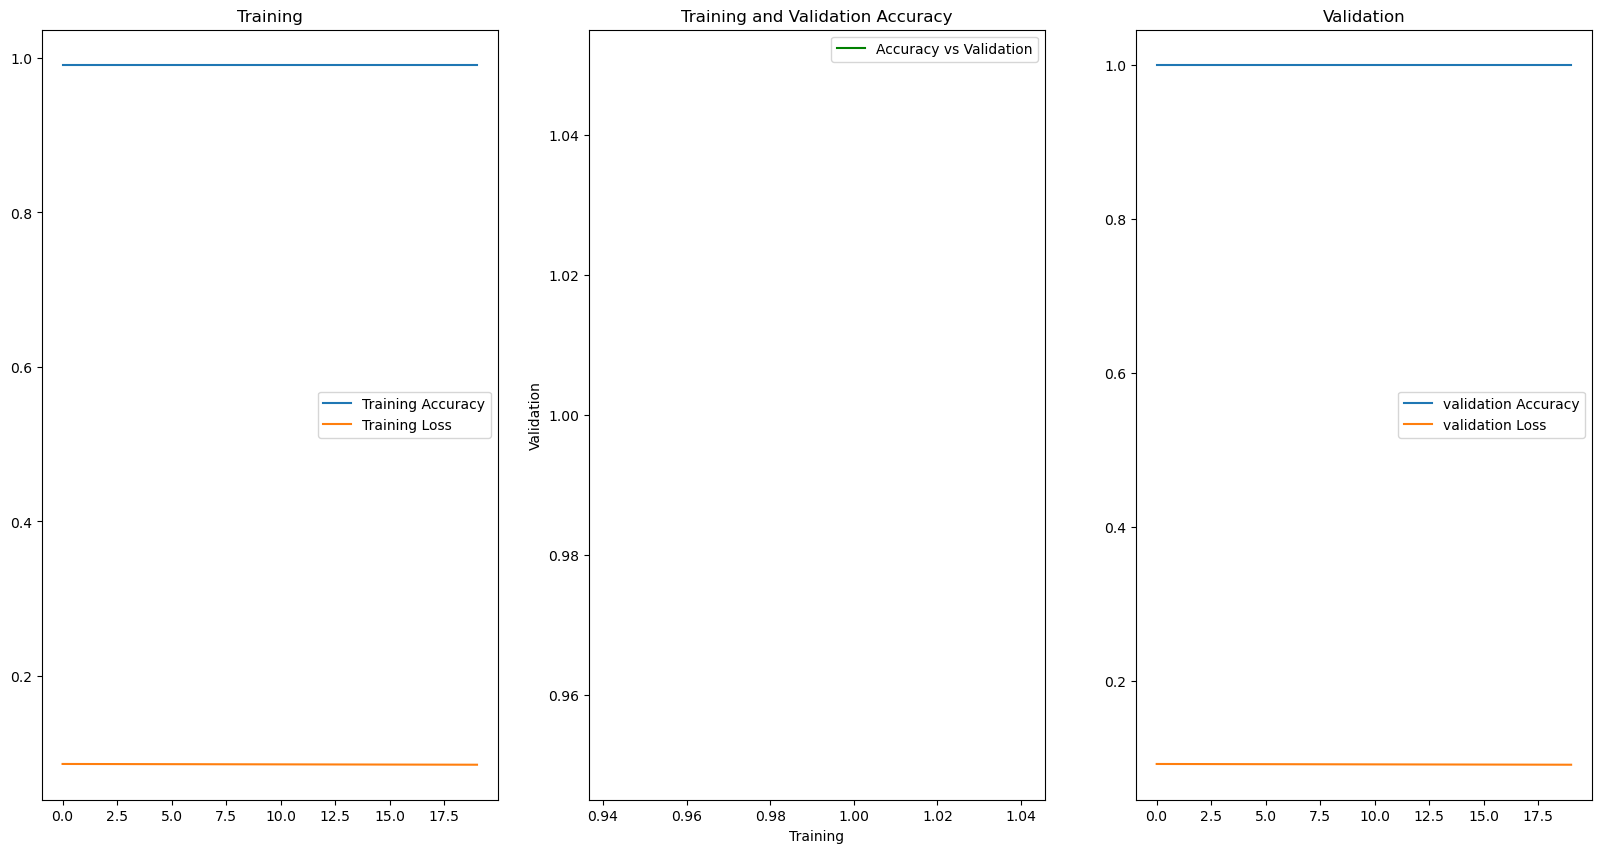

In [91]:
training_accuracy = history.history["accuracy"]
training_loss = history.history["loss"]

validation_accuracy = history.history["val_accuracy"]
validation_loss = history.history["val_loss"]

epochs = range(20)

plt.figure(figsize=[20, 10])

plt.subplot(1, 3, 1)

plt.plot(epochs, training_accuracy, label="Training Accuracy")
plt.plot(epochs, training_loss, label="Training Loss")

plt.title("Training")
plt.legend()

plt.subplot(1, 3, 2)

plt.plot(training_accuracy, validation_accuracy, label="Accuracy vs Validation", color="green")
plt.xlabel("Training")
plt.ylabel("Validation")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.subplot(1, 3, 3)

plt.plot(epochs, validation_accuracy, label="validation Accuracy")
plt.plot(epochs, validation_loss, label="validation Loss")

plt.title("Validation")
plt.legend()

plt.show()

In [93]:
score = model.evaluate(X_test, y_test)

score_df = pd.Series(score, index=model.metrics_names)

score_df

2/2 [==============================] - 0s 5ms/step - loss: 0.0779 - accuracy: 0.9722


loss        0.077929
accuracy    0.972222
dtype: float64

In [94]:
y_pred = model.predict(X_test)

y_pred[:10]

2/2 [==============================] - 0s 0s/step


array([[0.9614294 , 0.02614465, 0.01242594],
       [0.9261437 , 0.03684665, 0.03700966],
       [0.02356023, 0.06214403, 0.9142958 ],
       [0.96546704, 0.02560865, 0.00892423],
       [0.00680141, 0.98368776, 0.00951091],
       [0.98527294, 0.00786226, 0.00686482],
       [0.00766743, 0.9832985 , 0.00903404],
       [0.00870563, 0.01291081, 0.9783836 ],
       [0.06146119, 0.92800885, 0.01052997],
       [0.03295567, 0.06583533, 0.90120894]], dtype=float32)

In [95]:
y_pred = np.where(y_pred >= 0.5, 1, y_pred)

y_pred = np.where(y_pred < 0.5, 0, y_pred)

y_pred[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [96]:
accuracy_score(y_test, y_pred)

0.9722222222222222